## Exploratory Data Analysis & Visualization

In [348]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import  metrics
from sklearn import  linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import gaussian_process
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection

plt.style.use('fivethirtyeight')

In [349]:
energy = pd.read_csv('energy.csv',delimiter=";",decimal=",", index_col = [0], parse_dates = [0])

# Object type variables have converted to float type.
# The datetime  object have converted to date format.
df = energy.copy()

In [350]:
df.head()

,consumption (kWh),temperature (Celsius)
datetime,,
2018-01-01 00:00:00,816.0,7.00
2018-01-01 01:00:00,760.0,7.57
2018-01-01 02:00:00,752.0,7.50
2018-01-01 03:00:00,748.0,7.50
2018-01-01 04:00:00,778.0,NaN


In [351]:
df.tail()

,consumption (kWh),temperature (Celsius)
datetime,,
2019-12-31 19:00:00,930.0,5.83
2019-12-31 20:00:00,889.0,5.45
2019-12-31 21:00:00,890.0,5.26
2019-12-31 22:00:00,689.0,5.16
2019-12-31 23:00:00,897.0,5.01


#####  Structured Information of Dataset

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17491 entries, 2018-01-01 00:00:00 to 2019-12-31 23:00:00
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   consumption (kWh)      17459 non-null  float64
 1   temperature (Celsius)  16230 non-null  float64
dtypes: float64(2)
memory usage: 409.9 KB


In [353]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
consumption (kWh),17459.0,1070.130016,359.266140,13.89,831.00,1034.000,1236.0,20623.00
temperature (Celsius),16230.0,16.891285,7.299669,-3.00,10.75,17.345,23.0,33.25


In [354]:
## df.describe(include = "all").T

#### Continuously Variable Properties

In [355]:
df_num = df.select_dtypes(include = ["float64"])
df_num.head()

,consumption (kWh),temperature (Celsius)
datetime,,
2018-01-01 00:00:00,816.0,7.00
2018-01-01 01:00:00,760.0,7.57
2018-01-01 02:00:00,752.0,7.50
2018-01-01 03:00:00,748.0,7.50
2018-01-01 04:00:00,778.0,NaN


In [356]:
print("Mean: " + str(df_num["consumption (kWh)"].mean()))
print("Filled values: " + str(df_num["consumption (kWh)"].count())) 
print("Max: " + str(df_num["consumption (kWh)"].max()))
print("Min: " + str(df_num["consumption (kWh)"].min()))
print("Median: " + str(df_num["consumption (kWh)"].median()))
print("Standard deviation: " + str(df_num["consumption (kWh)"].std()))

Mean: 1070.1300160375738
Filled values: 17459
Max: 20623.0
Min: 13.89
Median: 1034.0
Standard deviation: 359.2661400253616


In [357]:
print("Mean: " + str(df_num["temperature (Celsius)"].mean()))
print("Filled values: " + str(df_num["temperature (Celsius)"].count())) 
print("Max: " + str(df_num["temperature (Celsius)"].max()))
print("Min: " + str(df_num["temperature (Celsius)"].min()))
print("Median: " + str(df_num["temperature (Celsius)"].median()))
print("Standard deviation: " + str(df_num["temperature (Celsius)"].std()))

Mean: 16.891285274183506
Filled values: 16230
Max: 33.25
Min: -3.0
Median: 17.345
Standard deviation: 7.299669036620176


### Sort the dataframe by 'Energy Consumption' in ascending order

In [358]:
df_sort_kW = df.sort_values(by = 'consumption (kWh)', ascending = True) 
print(df_sort_kW [:10]) 

# view first 10 entries, lowest energy consumption is on 17 April

                     consumption (kWh)  temperature (Celsius)
datetime                                                     
2018-04-17 05:00:00              13.89                  10.00
2018-04-17 06:00:00              14.34                  10.50
2019-08-09 05:00:00              57.93                  21.10
2019-12-28 12:00:00              64.23                   6.39
2018-10-03 22:00:00              70.00                    NaN
2018-12-17 19:00:00              85.06                  10.74
2019-06-24 20:00:00             104.78                  26.95
2018-05-03 01:00:00             115.00                    NaN
2019-06-24 21:00:00             118.97                  26.11
2018-01-02 08:00:00             129.00                    NaN


### Analyze of Missing Values

In [359]:
df.isnull().values.any()  # Is There any missing value?

True

In [360]:
df.isnull().sum()  # How many in which variable?

consumption (kWh)          32
temperature (Celsius)    1261
dtype: int64

### Filling in Missing Values

Burada veri setinin hikayesi bilinmelidir.
Hızlı çözüm: eksik değerlerin direkt silinmesi
asit değer atama: ortalama değer eklemesi yapılabilir, median ataması yapılabilir. Veya tahmine dayalı değer atama yapılabilir.

In [363]:
total_cells = np.product(df.shape)

missing_values_count = df.isnull().sum()

total_missing = missing_values_count.sum()

# Let's see how much the missing data is as a percentage (%)
(total_missing/total_cells) * 100  # it is acceptable.

3.6961866102567034

In [365]:
df.isnull().sum()  # How many in which variable?

consumption (kWh)          32
temperature (Celsius)    1261
dtype: int64

### Filling the 'consumption (kWh)' value with Mean

In [366]:
df['consumption (kWh)'].replace([np.nan], df['consumption (kWh)'].mean(), inplace=True)

### Filling the 'temperature (Celsius)' value with bfill
Filling the temperature value with bfill based on the next observation

In [367]:
df['temperature (Celsius)'] = df['temperature (Celsius)'].fillna(method="bfill")

In [368]:
df.isnull().sum()  # How many in which variable?

consumption (kWh)        0
temperature (Celsius)    0
dtype: int64

### The relationship between Consumption and Temperature 

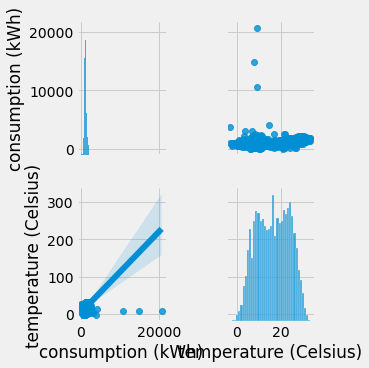

In [369]:
sns.pairplot(df,kind="reg");

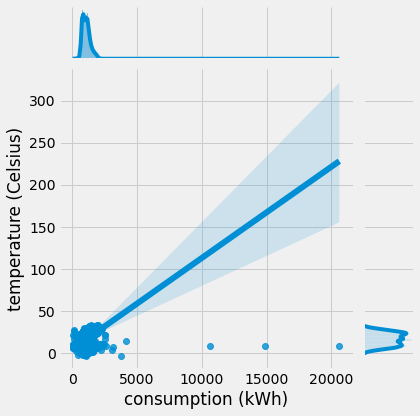

In [370]:
sns.jointplot(x = df['consumption (kWh)'], y = df['temperature (Celsius)'], data = df, kind = "reg");

<AxesSubplot:xlabel='temperature (Celsius)', ylabel='consumption (kWh)'>

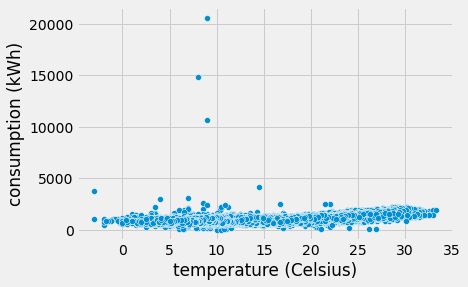

In [371]:
sns.scatterplot(x = df['temperature (Celsius)'], y = df['consumption (kWh)'], data=df)

### The relationship between Consumption and Datetime

In [372]:
df_new = df.drop('temperature (Celsius)', 1)

In [373]:
df_new.head()

,consumption (kWh)
datetime,
2018-01-01 00:00:00,816.0
2018-01-01 01:00:00,760.0
2018-01-01 02:00:00,752.0
2018-01-01 03:00:00,748.0
2018-01-01 04:00:00,778.0


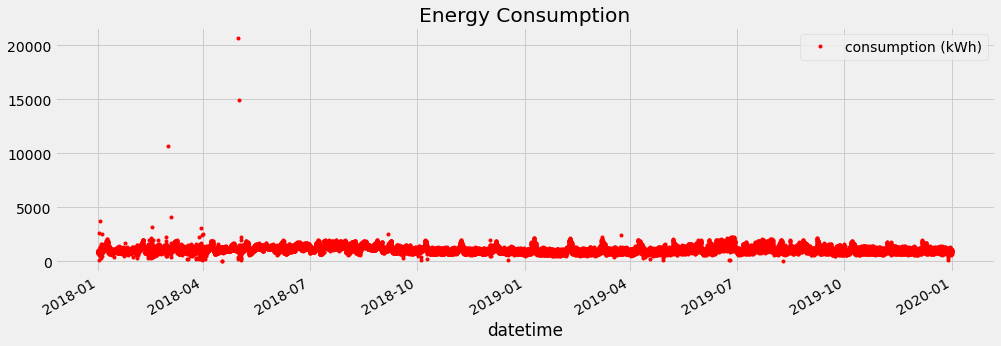

In [374]:
df_new.plot(style = '.' , color = "red", figsize = (15,5), title = "Energy Consumption");

### Splitting Parts of Datetime

In [375]:
df_new['date'] = df_new.index
df_new['hour'] = df_new['date'].dt.hour
df_new['dayofweek'] = df_new['date'].dt.dayofweek
df_new['quarter'] = df_new['date'].dt.quarter
df_new['month'] = df_new['date'].dt.month
df_new['year'] = df_new['date'].dt.year
df_new['dayofyear'] = df_new['date'].dt.dayofyear
df_new['dayofmonth'] = df_new['date'].dt.day
df_new['weekofyear'] = df_new['date'].dt.weekofyear
df_new.drop(['date'], axis = 1, inplace=True)

In [376]:
df_new.head()

,consumption (kWh),hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,
2018-01-01 00:00:00,816.0,0,0,1,1,2018,1,1,1
2018-01-01 01:00:00,760.0,1,0,1,1,2018,1,1,1
2018-01-01 02:00:00,752.0,2,0,1,1,2018,1,1,1
2018-01-01 03:00:00,748.0,3,0,1,1,2018,1,1,1
2018-01-01 04:00:00,778.0,4,0,1,1,2018,1,1,1


In [377]:
df_new.tail()

,consumption (kWh),hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,
2019-12-31 19:00:00,930.0,19,1,4,12,2019,365,31,1
2019-12-31 20:00:00,889.0,20,1,4,12,2019,365,31,1
2019-12-31 21:00:00,890.0,21,1,4,12,2019,365,31,1
2019-12-31 22:00:00,689.0,22,1,4,12,2019,365,31,1
2019-12-31 23:00:00,897.0,23,1,4,12,2019,365,31,1


### HOUR

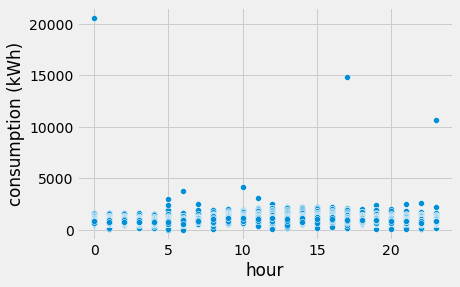

In [378]:
sns.scatterplot('hour','consumption (kWh)', data=df_new); ##avg

### DayofWeek

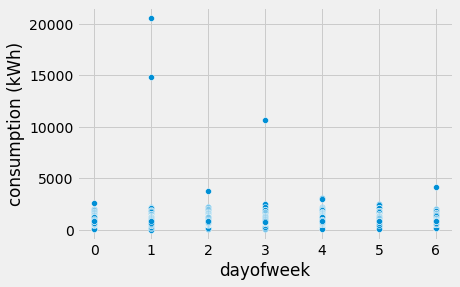

In [379]:
sns.scatterplot('dayofweek','consumption (kWh)', data=df_new);

### Month

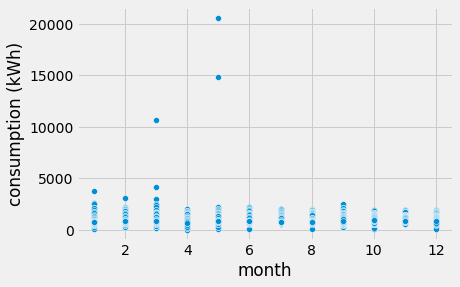

In [380]:
sns.scatterplot('month','consumption (kWh)', data=df_new);

### YEAR

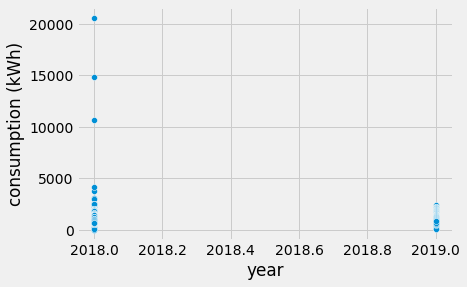

In [381]:
sns.scatterplot('year','consumption (kWh)', data=df_new);

Yearly: Energy consumption is higher in the Summer/Winter as people turn on their heating or AC, and lower in Spring/Fall.

Weekly: Energy consumption is higher on the weekdays as industry are running.

Daily: Energy consumption is lower at night, and higher as the day starts and continues.

Seasonally: The consumption energy demand looks different whether it's summer or winter.

#### Yearly

NameError: name 'pl' is not defined

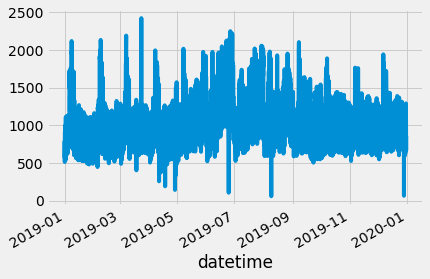

In [385]:
df_new.loc[(df_new.index > '2019-1-1') & (df_new.index < '2019-12-31')]["consumption (kWh)"].plot()
pl.ylabel("Energy Consumption")
pl.title("Energy Consumpton for 2019");

#### Daily

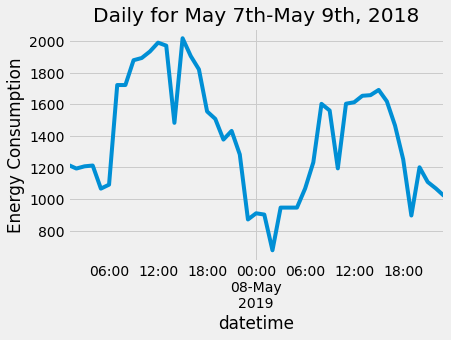

In [197]:
df_new.loc[(df_new.index > '2019-5-07') & (df_new.index < '2019-5-09')]["consumption (kWh)"].plot()
pl.ylabel("Energy Consumption")
pl.title("Daily for May 7th-May 9th, 2018");

### So energy usage will (typically) peak around 6pm, decrease through the night, and increase through the morning.

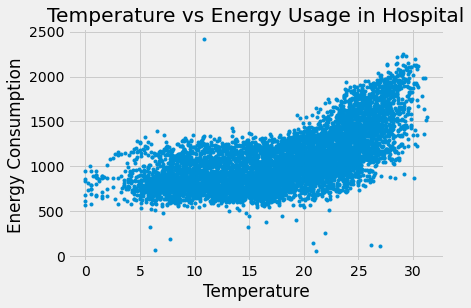

In [208]:
pl.plot(df['temperature (Celsius)'][10000:], df_new['consumption (kWh)'][10000:], '.')
pl.xlabel('Temperature')
pl.ylabel('Energy Consumption')
pl.title('Temperature vs Energy Usage in Hospital');

### Other notes:

Fall and Spring look like a transition between winter and summer--their load graphs are inbetween a double peak and a single peak

Weather intuitively has a strong correlation with energy usage, thus are great variables to use when forecasting future energy demand.

One last graph that's nice to look at is Temperature vs Energy Consumption. These are commonly used to show forecasting results. Notice that at the ends (colder temperature and hotter temperature), energy demand curves up, as we would expect.

### TRAIN-TEST SPLIT

In [386]:
split_date = '01-July-2019'
df_train = df_new.loc[df.index <= split_date].copy()
df_test = df_new.loc[df.index > split_date].copy()

In [387]:
df_test.shape

(4415, 9)

In [388]:
df_train.shape

(13076, 9)

In [389]:
df_train.head()

,consumption (kWh),hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,
2018-01-01 00:00:00,816.0,0,0,1,1,2018,1,1,1
2018-01-01 01:00:00,760.0,1,0,1,1,2018,1,1,1
2018-01-01 02:00:00,752.0,2,0,1,1,2018,1,1,1
2018-01-01 03:00:00,748.0,3,0,1,1,2018,1,1,1
2018-01-01 04:00:00,778.0,4,0,1,1,2018,1,1,1


In [390]:
df_test.head()

,consumption (kWh),hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
datetime,,,,,,,,,
2019-07-01 01:00:00,834.0,1,0,3,7,2019,182,1,27
2019-07-01 02:00:00,787.0,2,0,3,7,2019,182,1,27
2019-07-01 03:00:00,755.0,3,0,3,7,2019,182,1,27
2019-07-01 04:00:00,751.0,4,0,3,7,2019,182,1,27
2019-07-01 05:00:00,772.0,5,0,3,7,2019,182,1,27


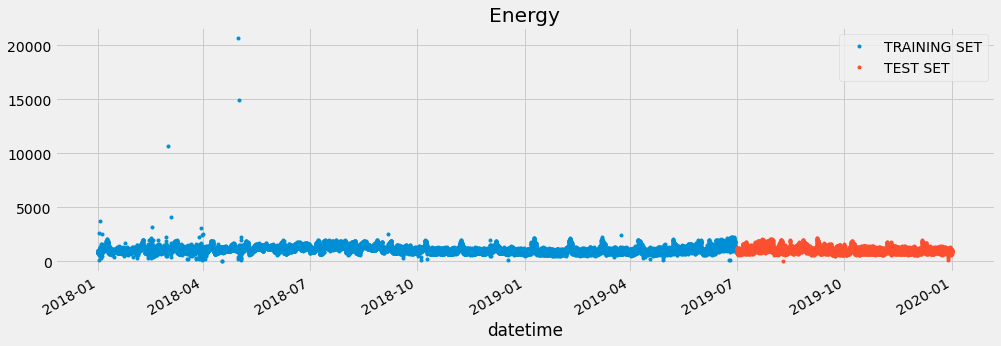

In [391]:
(df_train.rename(columns={'consumption (kWh)': 'TRAINING SET'})).append(df_test.rename(columns={'consumption (kWh)': 'TEST SET'}), sort = False)[['TRAINING SET','TEST SET']].plot(style='.', figsize = (15,5), title = "Energy");

### MODEL

In [392]:
x_train = df_train[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
x_test = df_test[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
y_train = df_train[['consumption (kWh)']]
y_test = df_test[['consumption (kWh)']]

##### XG BOOST MODEL

In [393]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [394]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(x_train, y_train,
       eval_set = [(x_train, y_train), (x_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

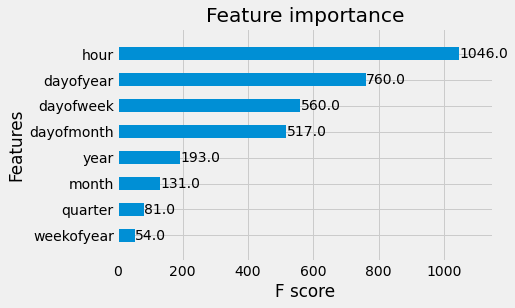

In [395]:
plot_importance(reg, height = 0.5)

In [396]:
df_test['Energy_Prediction'] = reg.predict(x_test)
df_all = pd.concat([df_test, df_train], sort=False)

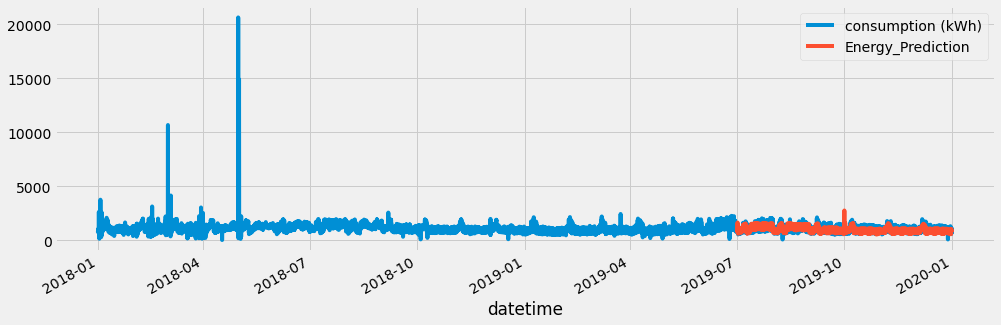

In [397]:
df_all[['consumption (kWh)','Energy_Prediction']].plot(figsize=(15, 5));

### First Month Prediction

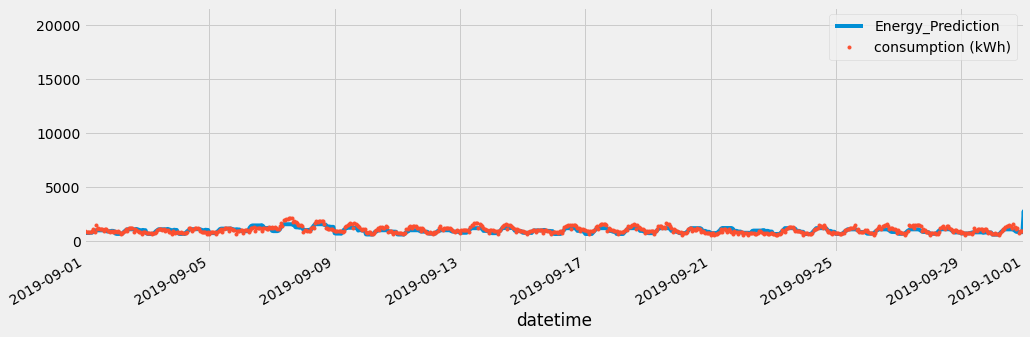

In [398]:
_, ax = plt.subplots(1)
df_all[['Energy_Prediction','consumption (kWh)']].plot(ax=ax, style=['-','.'],figsize=(15, 5))
ax.set_xbound(lower='09-01-2019', upper='10-01-2019')

#### First week of November 2019

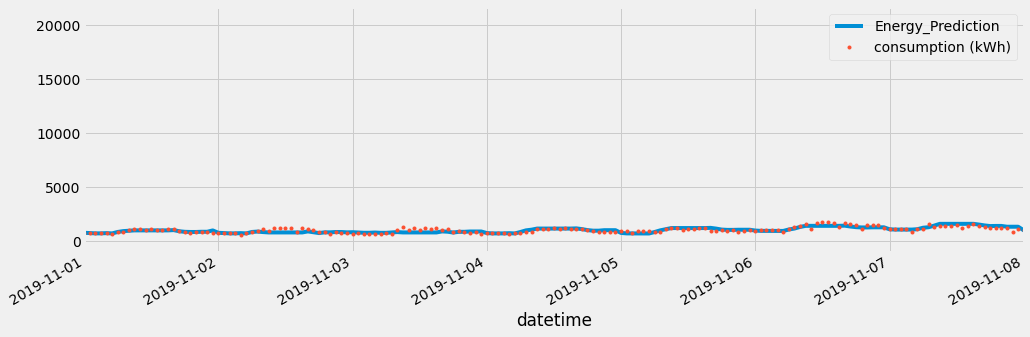

In [399]:
_, ax = plt.subplots(1)
df_all[['Energy_Prediction','consumption (kWh)']].plot(ax=ax, style=['-','.'],figsize=(15, 5))
ax.set_xbound(lower='11-01-2019', upper='11-08-2019')

#### Error Metrics

In [400]:
mean_squared_error(y_true=df_test['consumption (kWh)'],
                   y_pred=df_test['Energy_Prediction'])

37572.52931579403

In [401]:
mean_absolute_error(y_true=df_test['consumption (kWh)'],
                   y_pred=df_test['Energy_Prediction'])

153.45031417995293

In [402]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=df_test['consumption (kWh)'],
                   y_pred=df_test['Energy_Prediction'])

15.540583715667456

### Analysis of worst and best predicted months

In [403]:
df_test['error'] = df_test['consumption (kWh)'] - df_test['Energy_Prediction']
df_test['abs_error'] = df_test['error'].apply(np.abs)

In [404]:
error_by_month = df_test.groupby(['year','month','dayofmonth']).mean()[['consumption (kWh)','Energy_Prediction','error','abs_error']]

In [150]:
error_by_month.head(10)

consumption (kWh)  Energy_Prediction       error  \
year month dayofmonth                                                     
2019 7     1                  984.391304         927.658081   56.733250   
           2                  892.333333         896.717163   -4.383853   
           3                  887.250000         900.538086  -13.288076   
           4                  715.625000         929.625977 -214.000989   
           5                  947.083333         965.560913  -18.477562   
           6                 1241.875000        1188.863892   53.011154   
           7                 1262.750000        1260.768433    1.981595   
           8                 1257.125000        1237.078369   20.046649   
           9                 1130.750000        1094.557007   36.192978   
           10                 924.083333         929.964233   -5.880910   

                        abs_error  
year month dayofmonth              
2019 7     1           152.698428  
           2           111.520002  
           3           114.377940  
           4           217.565290  
           5           105.802152  
           6           139.697016  
           7            90.686358  
           8           117.027682  
           9           123.863632  
           10          108.502869

In [405]:
error_by_month = df_test.groupby(['year','month']).mean()[['consumption (kWh)','Energy_Prediction','error','abs_error']]
error_by_month.head(10)

consumption (kWh)  Energy_Prediction      error   abs_error
year month                                                             
2019 7            1204.641992        1181.513062  23.128903  146.315217
     8            1108.254032        1162.405762 -54.151687  173.936810
     9            1018.675000         939.796082  78.878897  162.627916
     10            970.732191         901.903015  68.829206  144.767961
     11            979.844278         892.124695  87.719582  141.631388
     12            983.420618         891.253174  92.167426  151.327798

#### Over feorecasted months

#### Worst Absolute Predicted months

In [406]:
error_by_month.sort_values('abs_error', ascending=False).head(10)

consumption (kWh)  Energy_Prediction      error   abs_error
year month                                                             
2019 8            1108.254032        1162.405762 -54.151687  173.936810
     9            1018.675000         939.796082  78.878897  162.627916
     12            983.420618         891.253174  92.167426  151.327798
     7            1204.641992        1181.513062  23.128903  146.315217
     10            970.732191         901.903015  68.829206  144.767961
     11            979.844278         892.124695  87.719582  141.631388

#### Best Absolute Predicted months

The best predicted months seem to be a lot of months of  summer or winter .

In [407]:
error_by_month.sort_values('abs_error', ascending=True).head(10)

consumption (kWh)  Energy_Prediction      error   abs_error
year month                                                             
2019 11            979.844278         892.124695  87.719582  141.631388
     10            970.732191         901.903015  68.829206  144.767961
     7            1204.641992        1181.513062  23.128903  146.315217
     12            983.420618         891.253174  92.167426  151.327798
     9            1018.675000         939.796082  78.878897  162.627916
     8            1108.254032        1162.405762 -54.151687  173.936810

#### Plotting Best/Worst predicted Months

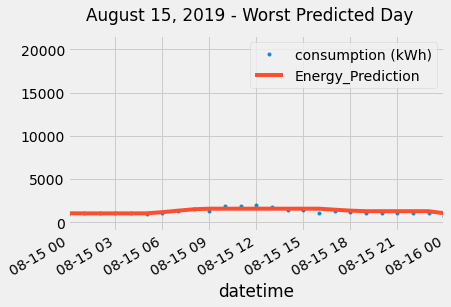

In [408]:
_, ax = plt.subplots(1)
df_all[['consumption (kWh)','Energy_Prediction']].plot(ax=ax, style=['.','-'])
ax.set_xbound(lower='08-15-2019', upper='08-16-2019')
plot = plt.suptitle('August 15, 2019 - Worst Predicted Day')

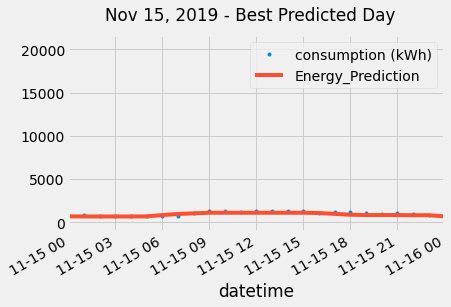

In [409]:
_, ax = plt.subplots(1)
df_all[['consumption (kWh)','Energy_Prediction']].plot(ax=ax, style=['.','-'])
ax.set_xbound(lower='11-15-2019', upper='11-16-2019')
plot = plt.suptitle('Nov 15, 2019 - Best Predicted Day')

### Linear Regression Model

In [410]:
y = df["consumption (kWh)"]
X = df['temperature (Celsius)']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [411]:
X = sm.add_constant(X)

In [412]:
X[0:5]

,const,temperature (Celsius)
datetime,,
2018-01-01 00:00:00,1.0,7.00
2018-01-01 01:00:00,1.0,7.57
2018-01-01 02:00:00,1.0,7.50
2018-01-01 03:00:00,1.0,7.50
2018-01-01 04:00:00,1.0,7.25


In [413]:
y = df["consumption (kWh)"]
y[0:7]

datetime
2018-01-01 00:00:00    816.0
2018-01-01 01:00:00    760.0
2018-01-01 02:00:00    752.0
2018-01-01 03:00:00    748.0
2018-01-01 04:00:00    778.0
2018-01-01 05:00:00    822.0
2018-01-01 06:00:00    776.0
Name: consumption (kWh), dtype: float64

In [414]:
lm = sm.OLS(y,X)
model = lm.fit()

In [415]:
model.summary()

## stats modelin summary fonksiyonuyla

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      consumption (kWh)   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     6807.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:53:07   Log-Likelihood:            -1.2485e+05
No. Observations:               17491   AIC:                         2.497e+05
Df Residuals:                   17489   BIC:                         2.497e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   644.4010      5.651    114.041      0.000     633.325     655.477
temperature (Celsius)    25.8846      0.314     82.504      0.000      25.270      26.500
==============================================================================
Omnibus:                    41402.331   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1290253617.390
Skew:                          23.396   Prob(JB):                         0.00
Kurtosis:                    1332.741   Cond. No.                         44.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [416]:
model.params
# modelin parametreleri

const                    644.400996
temperature (Celsius)     25.884590
dtype: float64

In [417]:
model.summary().tables[1]
# sadece katsayılara ilişkin değerler

,coef,std err,t,P>|t|,[0.025,0.975]
const,644.4010,5.651,114.041,0.000,633.325,655.477
temperature (Celsius),25.8846,0.314,82.504,0.000,25.270,26.500


In [418]:
model.mse_model
# hata kareleri ortalaması, korkunç bir değer

631311477.7190974

In [419]:
model.fittedvalues[0:5]

## modelin tahmin ettiği değerler

datetime
2018-01-01 00:00:00    825.593126
2018-01-01 01:00:00    840.347342
2018-01-01 02:00:00    838.535421
2018-01-01 03:00:00    838.535421
2018-01-01 04:00:00    832.064273
dtype: float64

In [420]:
y[0:5]
## gerçek değerler

datetime
2018-01-01 00:00:00    816.0
2018-01-01 01:00:00    760.0
2018-01-01 02:00:00    752.0
2018-01-01 03:00:00    748.0
2018-01-01 04:00:00    778.0
Name: consumption (kWh), dtype: float64

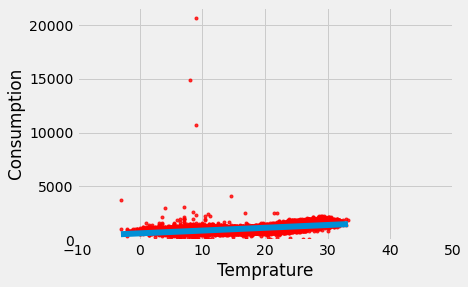

In [421]:
g = sns.regplot(df["temperature (Celsius)"], df["consumption (kWh)"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_ylabel("Consumption")
g.set_xlabel("Temprature")
import matplotlib.pyplot as plt
plt.xlim(-10,50)
plt.ylim(bottom=0);

In [422]:
from sklearn.linear_model import LinearRegression

In [423]:
X = df[["temperature (Celsius)"]]
y = df["consumption (kWh)"]
reg = LinearRegression()
model = reg.fit(X, y)
model.intercept_
model.coef_

array([25.88458994])

In [424]:
model.predict(X)[0:10]

## tahmin edilen değerler

array([825.59312565, 840.34734191, 838.53542062, 838.53542062,
       832.06427313, 832.06427313, 825.59312565, 812.65083068,
       812.65083068, 832.06427313])

#### Tahmin

In [425]:
model.predict([[25]])

array([1291.51574458])